# Data Analysis and Map-Reduce with MongoDB and pymongo

Alexander Hendorf (@hendorf), October Mongo MUG Paris

In [1]:
# present output into a nice table inline
class ListTable(list):
    """ Overwritten list class which takes a 2-dimensional list of
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in
        IPython Notebook. """
    title = None

    def _repr_html_(self):
        if len(self) == 0:
            return Image(filename='pic/boom.jpg')
        html = ["<h3>{}</h3>".format(self.title) if self.title else ""]
        html.append("<table>")
        for row in self:
            html.append("<tr>")

            for col in row:
                html.append("<td>{0}</td>".format(col))

            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [2]:
from IPython.display import HTML, Audio
from IPython.display import Image
import pymongo
import datetime
from pymongo import ASCENDING, DESCENDING
from bson.son import SON
from pprint import pprint
import json
from config import *

import pymongo driver, bson, json, some config parameters (e.g. database access) & 
make database connection

In [3]:
use_remotedb = False
if use_remotedb:
    # use remote server 
    db = pymongo.MongoClient(HOST, replicaSet=REPLICASET, readPreference='secondaryPreferred')[DB]
    db.authenticate(USER, PASS, source=AUTHDB)
else:
    # use local database
    db = pymongo.MongoClient("localhost:27017")['db']
    playlists = 'playlists'

our dataset

In [4]:
count = db[playlists].count()
HTML('<p style="height:30px"></p><p style="font-size: 36px">{:,} playlists found.</p><p>spoiler: with more than {:,} million songs.</p><p style="height:200px;"></p>'.format(count, 18))

# Aggregation Framework

In [5]:
query = {"info.artistName": artist}
count = db[playlists].count(query)
print("found {:,} releases for {}".format(count, artist))

found 93 releases for Taylor Swift


### \$match \$project

In [6]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$project": {"release": "$info.name", "_id": 0}},
]

In [7]:
res = db[playlists].aggregate(pipeline)
print("\n found {} documents\n".format(len(list(res))))


 found 93 documents



[]


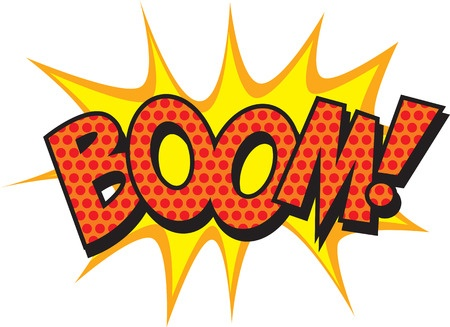

In [9]:
# let's hav a look at our dataset
print(list(res))
#
Image(filename='pic/boom.jpg')

In [10]:
cursor = db[playlists].aggregate(pipeline)
pprint(list(cursor)[:10])

[{'release': 'Fearless (Platinum Edition)'},
 {'release': 'Red'},
 {'release': 'Red (Deluxe Edition)'},
 {'release': 'We Are Never Ever Getting Back Together - Single'},
 {'release': 'Taylor Swift (Bonus Track Version)'},
 {'release': 'Fearless'},
 {'release': 'Speak Now'},
 {'release': 'Red (Deluxe Version)'},
 {'release': 'Red'},
 {'release': 'Speak Now (Bonus Track Version)'}]


In [11]:
cursor = db[playlists].aggregate(pipeline)
# output as HTML table
table = ListTable()
table.title = "releases of {}".format(artist)
table.append(['position', 'release'])
for i, l in enumerate(cursor, 1):
    table.append([i, l['release']])
table

[['position', 'release'],
 [1, 'Fearless (Platinum Edition)'],
 [2, 'Red'],
 [3, 'Red (Deluxe Edition)'],
 [4, 'We Are Never Ever Getting Back Together - Single'],
 [5, 'Taylor Swift (Bonus Track Version)'],
 [6, 'Fearless'],
 [7, 'Speak Now'],
 [8, 'Red (Deluxe Version)'],
 [9, 'Red'],
 [10, 'Speak Now (Bonus Track Version)'],
 [11, 'Everything Has Changed (Remix) [feat. Ed Sheeran] - Single'],
 [12,
  'Safe & Sound (From "The Hunger Games" Soundtrack) [feat. The Civil Wars] - Single'],
 [13, 'Speak Now (Deluxe Version)'],
 [14, 'Fearless (Platinum Edition)'],
 [15, 'Everything Has Changed (Remix) [feat. Ed Sheeran] - Single'],
 [16, 'Fearless'],
 [17, 'Speak Now (Extended Version)'],
 [18, 'Taylor Swift'],
 [19, 'Speak Now World Tour Live'],
 [20, 'Fearless (Bonus Track Version)'],
 [21, 'Fearless'],
 [22, 'Fearless (Deluxe Version)'],
 [23, 'Speak Now'],
 [24, 'Mine - Single'],
 [25, 'Red'],
 [26, 'Speak Now'],
 [27, 'Fearless (Karaoke Version)'],
 [28, 'Red (Deluxe)'],
 [29, 'Fearless'],
 [30, 'Speak Now - World Tour Live'],
 [31, 'Love Story (Remix Bundle) - Single'],
 [32, 'Teardrops On My Guitar - EP'],
 [33, 'You Belong With Me (Radio Mix) - Single'],
 [34, 'Fearless (Japan Digital Version)'],
 [35,
  'Safe & Sound (From "The Hunger Games" Soundtrack) [feat. The Civil Wars] - Single'],
 [36, 'Fearless (Platinum Edition)'],
 [37, 'Long Live (feat. Paula Fernandes) - Single'],
 [38, 'Love Story - Single'],
 [39, 'Red (Deluxe Version)'],
 [40, 'Fearless (Bonus Track Version)'],
 [41, 'Love Story (Stripped) - Single'],
 [42, 'iTunes Live from SoHo'],
 [43, 'Speak Now: World Tour Live'],
 [44, 'Speak Now'],
 [45, 'Fearless (Platinum Edition) [Audio Version]'],
 [46, 'Fearless (Platinum Edition)'],
 [47, 'Live From SoHo (iTunes exclusive)'],
 [48, 'You Belong With Me - EP'],
 [49, 'Love Story - Single'],
 [50, 'Today Was a Fairytale - Single'],
 [51, 'Taylor Swift (Karaoke Version)'],
 [52, 'Speak Now - World Tour Live'],
 [53, 'Sweeter Than Fiction (From "One Chance") - Single'],
 [54, 'Sweeter Than Fiction (From "One Chance") - Single'],
 [55, 'The Taylor Swift Holiday Collection - Single'],
 [56,
  'Red (2013 CMA Awards Performance) [feat. Alison Krauss, Edgar Meyer, Eric Darken, Sam Bush & Vince Gill] - Single'],
 [57, 'Sweeter Than Fiction - Single'],
 [58,
  'Red (feat. Alison Krauss, Edgar Meyer, Eric Darken, Sam Bush & Vince Gill) [Live At the CMA Awards / 2013] - Single'],
 [59, 'Red'],
 [60, 'The Taylor Swift Holiday Collection - EP'],
 [61, 'The Taylor Swift Holiday Collection - EP'],
 [62, 'We Are Never Ever Getting Back Together - Single'],
 [63, 'Red (Karaoke Version)'],
 [64, 'Mine - Single'],
 [65, 'Today Was a Fairytale - Single'],
 [66, 'Back to December - Single'],
 [67, 'Speak Now (Karaoke Version)'],
 [68, 'Taylor Swift'],
 [69, '1989 (Deluxe)'],
 [70, '1989'],
 [71, '1989 (Deluxe Edition)'],
 [72, '1989 (Deluxe)'],
 [73, '1989'],
 [74, '1989'],
 [75, '1989 (Deluxe)'],
 [76, '1989'],
 [77, 'Taylor Swift Karaoke: 1989'],
 [78, 'Taylor Swift Karaoke: 1989'],
 [79, 'Taylor Swift Karaoke: 1989 (Deluxe)'],
 [80, 'Love Story - Single'],
 [81, 'Speak Now - Single'],
 [82, 'Wonderland - Single'],
 [83, 'You Are In Love'],
 [84, 'New Romantics - Single'],
 [85, 'Taylor Swift Karaoke: 1989'],
 [86, 'Taylor Swift Karaoke: 1989 (Deluxe Edition)'],
 [87, 'Taylor Swift Karaoke: 1989 (Deluxe)'],
 [88, 'Taylor Swift Karaoke: 1989 (Deluxe)'],
 [89, 'Taylor Swift Karaoke: 1989 (Deluxe)'],
 [90, 'Bad Blood (feat. Kendrick Lamar) - Single'],
 [91, 'Bad Blood (feat. Kendrick Lamar) - Single'],
 [92, 'Taylor Swift Karaoke: Speak Now'],
 [93, 'Love Story - EP']]

In [12]:
# <<<<








#

###  $group

In [13]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    {"$group": {
       "_id": "$info.name",
       "count": {"$sum": 1}}},
   
    {"$project": {"release": "$_id", "_id": 0, "count": 1}},
    {"$sort": {"release": ASCENDING}}
]

In [14]:
cursor = db[playlists].aggregate(pipeline)
table2 = ListTable()
table2.title = "duplicate releases of {}".format(artist)
table2.append(['count', 'release'])
for l in cursor:
    table2.append([l.get('count'), l.get('release')])
table2

[['count', 'release'],
 [4, '1989'],
 [1, '1989 (Deluxe Edition)'],
 [3, '1989 (Deluxe)'],
 [1, 'Back to December - Single'],
 [2, 'Bad Blood (feat. Kendrick Lamar) - Single'],
 [2, 'Everything Has Changed (Remix) [feat. Ed Sheeran] - Single'],
 [4, 'Fearless'],
 [2, 'Fearless (Bonus Track Version)'],
 [1, 'Fearless (Deluxe Version)'],
 [1, 'Fearless (Japan Digital Version)'],
 [1, 'Fearless (Karaoke Version)'],
 [4, 'Fearless (Platinum Edition)'],
 [1, 'Fearless (Platinum Edition) [Audio Version]'],
 [1, 'Live From SoHo (iTunes exclusive)'],
 [1, 'Long Live (feat. Paula Fernandes) - Single'],
 [1, 'Love Story (Remix Bundle) - Single'],
 [1, 'Love Story (Stripped) - Single'],
 [1, 'Love Story - EP'],
 [3, 'Love Story - Single'],
 [2, 'Mine - Single'],
 [1, 'New Romantics - Single'],
 [4, 'Red'],
 [1,
  'Red (2013 CMA Awards Performance) [feat. Alison Krauss, Edgar Meyer, Eric Darken, Sam Bush & Vince Gill] - Single'],
 [1, 'Red (Deluxe Edition)'],
 [2, 'Red (Deluxe Version)'],
 [1, 'Red (Deluxe)'],
 [1, 'Red (Karaoke Version)'],
 [1,
  'Red (feat. Alison Krauss, Edgar Meyer, Eric Darken, Sam Bush & Vince Gill) [Live At the CMA Awards / 2013] - Single'],
 [2,
  'Safe & Sound (From "The Hunger Games" Soundtrack) [feat. The Civil Wars] - Single'],
 [4, 'Speak Now'],
 [1, 'Speak Now (Bonus Track Version)'],
 [1, 'Speak Now (Deluxe Version)'],
 [1, 'Speak Now (Extended Version)'],
 [1, 'Speak Now (Karaoke Version)'],
 [1, 'Speak Now - Single'],
 [2, 'Speak Now - World Tour Live'],
 [1, 'Speak Now World Tour Live'],
 [1, 'Speak Now: World Tour Live'],
 [2, 'Sweeter Than Fiction (From "One Chance") - Single'],
 [1, 'Sweeter Than Fiction - Single'],
 [2, 'Taylor Swift'],
 [1, 'Taylor Swift (Bonus Track Version)'],
 [1, 'Taylor Swift (Karaoke Version)'],
 [3, 'Taylor Swift Karaoke: 1989'],
 [1, 'Taylor Swift Karaoke: 1989 (Deluxe Edition)'],
 [4, 'Taylor Swift Karaoke: 1989 (Deluxe)'],
 [1, 'Taylor Swift Karaoke: Speak Now'],
 [1, 'Teardrops On My Guitar - EP'],
 [2, 'The Taylor Swift Holiday Collection - EP'],
 [1, 'The Taylor Swift Holiday Collection - Single'],
 [2, 'Today Was a Fairytale - Single'],
 [2, 'We Are Never Ever Getting Back Together - Single'],
 [1, 'Wonderland - Single'],
 [1, 'You Are In Love'],
 [1, 'You Belong With Me (Radio Mix) - Single'],
 [1, 'You Belong With Me - EP'],
 [1, 'iTunes Live from SoHo']]

###  \$group - \$sort -  \$limit

In [17]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$group": {
        "_id": "$info.name",
        "count": {"$sum": 1}
    }},
    {"$project": {"release": "$_id", "count": 1, "_id": 0}},
    
   {"$sort": {"count": DESCENDING, "release": ASCENDING}},
#    {"$sort": {"release": ASCENDING, "count": DESCENDING}},

    {"$limit": 10},
    
]

In [16]:
cursor = db[playlists].aggregate(pipeline)
table3 = ListTable()
table3.title = "top duplicate releases of {}".format(artist)
table3.append(['count', 'release'])
for l in cursor:
    table3.append([l.get('count'), l.get('release')])
table3

[['count', 'release'],
 [4, '1989'],
 [4, 'Fearless'],
 [4, 'Fearless (Platinum Edition)'],
 [4, 'Red'],
 [4, 'Speak Now'],
 [4, 'Taylor Swift Karaoke: 1989 (Deluxe)'],
 [3, '1989 (Deluxe)'],
 [3, 'Love Story - Single'],
 [3, 'Taylor Swift Karaoke: 1989'],
 [2, 'Bad Blood (feat. Kendrick Lamar) - Single']]

#### mind the sort datatype

In [18]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$group": {
        "_id": "$info.name",
        "count": {"$sum": 1}
    }},
    {"$project": {"release": "$_id", "count": "$count", "_id": 0}},
    # caveat sort order: use collections.OrderDict or bson.SON!
   {"$sort": SON([("release", ASCENDING),("count", DESCENDING)])},
#    {"$sort": SON([("count", DESCENDING), ("release", ASCENDING)])},

    {"$limit": 10},
]

In [19]:
cursor = db[playlists].aggregate(pipeline)
table3 = ListTable()
table3.title = "top duplicate releases of {}".format(artist)
table3.append(['count', 'release'])
for l in cursor:
    table3.append([l.get('count'), l.get('release')])
table3

[['count', 'release'],
 [4, '1989'],
 [1, '1989 (Deluxe Edition)'],
 [3, '1989 (Deluxe)'],
 [1, 'Back to December - Single'],
 [2, 'Bad Blood (feat. Kendrick Lamar) - Single'],
 [2, 'Everything Has Changed (Remix) [feat. Ed Sheeran] - Single'],
 [4, 'Fearless'],
 [2, 'Fearless (Bonus Track Version)'],
 [1, 'Fearless (Deluxe Version)'],
 [1, 'Fearless (Japan Digital Version)']]

In [20]:
# <<<<








#

### $unwind

In [21]:
# aggregate information in subdocuments
# get all the songs
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$unwind": "$info.children"},
    
    
    {"$group": {
        "_id": "$info.children.name"
    }},
    {"$project": {"song": "$_id", "_id": 0}},
    {"$sort": SON([("song", ASCENDING)])},
]

In [22]:
cursor = db[playlists].aggregate(pipeline)
table3 = ListTable()
table3.title = "songs of {}".format(artist)
table3.append(['position', 'release'])
for i, l in enumerate(cursor, 1):
    table3.append([i, l.get('song')])
table3

[['position', 'release'],
 [1, '22'],
 [2, '22 (Karaoke Version)'],
 [3, 'A Perfectly Good Heart'],
 [4, 'A Perfectly Good Heart (Karaoke Version)'],
 [5, 'A Place In This World'],
 [6, 'A Place In This World (Karaoke Version)'],
 [7, 'A Place In This World (Live)'],
 [8, 'A Place In This World (iTunes Live from SoHo)'],
 [9, 'All Too Well'],
 [10, 'All Too Well (Karaoke Version)'],
 [11, 'All You Had To Do Was Stay (Instrumental With Background Vocals)'],
 [12, 'All You Had To Do Was Stay (Karaoke Version)'],
 [13, 'All You Had to Do Was Stay (Karaoke Version)'],
 [14, 'Back To December (Instrumental With Background Vocals)'],
 [15, 'Back to December'],
 [16, 'Back to December (Acoustic Version)'],
 [17, 'Back to December (Karaoke Version)'],
 [18, 'Back to December (US Version)'],
 [19, "Back to December / Apologize / You're Not Sorry (Live 2011)"],
 [20,
  "Back to December / Apologize / You're Not Sorry (Live from Chicago/San Jose 2011)"],
 [21, "Back to December / Apologize / You're Not Sorry (Live)"],
 [22, 'Bad Blood (Instrumental With Background Vocals)'],
 [23, 'Bad Blood (Karaoke Version)'],
 [24, 'Bad Blood (feat. Kendrick Lamar)'],
 [25, 'Beautiful Eyes'],
 [26, 'Begin Again'],
 [27, 'Begin Again (Karaoke Version)'],
 [28, "Behind the Scenes 'Mine' Music Video"],
 [29, 'Bette Davis Eyes (Live 2011)'],
 [30, 'Bette Davis Eyes (Live from Los Angeles 2011)'],
 [31, 'Bette Davis Eyes (Live)'],
 [32, 'Better Than Revenge'],
 [33, 'Better Than Revenge (Instrumental With Background Vocals)'],
 [34, 'Better Than Revenge (Karaoke Version)'],
 [35, 'Better Than Revenge (Live 2011)'],
 [36, 'Better Than Revenge (Live from San Jose 2011)'],
 [37, 'Better Than Revenge (Live)'],
 [38, 'Blank Space (Instrumental With Background Vocals)'],
 [39, 'Blank Space (Karaoke Version)'],
 [40, 'Breathe'],
 [41, 'Breathe (feat. Colbie Caillat)'],
 [42, 'Breathe (feat. Colbie Caillat) [Karaoke Version]'],
 [43, 'Breathe (feat. Colbie Caillat) [feat. Colbie Caillat]'],
 [44, 'CMT Awards "Thug Story"'],
 [45, 'Change'],
 [46, 'Change (Karaoke Version)'],
 [47, 'Christmas Must Be Something More'],
 [48, 'Christmases When You Were Mine'],
 [49, 'Clean (Instrumental With Background Vocals)'],
 [50, 'Clean (Karaoke Version)'],
 [51, 'Cold As You'],
 [52, 'Cold As You (Karaoke Version)'],
 [53, 'Come Back... Be Here'],
 [54, 'Come In With The Rain'],
 [55, 'Come In With the Rain'],
 [56, 'Dear John'],
 [57, 'Dear John (Instrumental With Background Vocals)'],
 [58, 'Dear John (Karaoke Version)'],
 [59, 'Dear John (Live 2011)'],
 [60, 'Dear John (Live from Chicago/San Jose 2011)'],
 [61, 'Dear John (Live)'],
 [62, 'Digital Booklet - 1989'],
 [63, 'Digital Booklet - 1989 (Deluxe)'],
 [64, 'Digital Booklet - Fearless'],
 [65, 'Digital Booklet - Red'],
 [66, 'Digital Booklet - Red (Deluxe)'],
 [67, 'Digital Booklet - Red (Karaoke Version)'],
 [68, 'Digital Booklet - Taylor Swift Karaoke: 1989'],
 [69, 'Digital Booklet - Taylor Swift Karaoke: 1989 (Deluxe)'],
 [70, 'Digital Booklet - Taylor Swift Karaoke: Speak Now'],
 [71, 'Digital Booklet - iTunes'],
 [72, 'Digital Booklet - iTunes exclusive'],
 [73, 'Drops of Jupiter (Live 2011)'],
 [74, 'Drops of Jupiter (Live from San Jose 2011)'],
 [75, 'Drops of Jupiter (Live)'],
 [76, 'Enchanted'],
 [77, 'Enchanted (Instrumental With Background Vocals)'],
 [78, 'Enchanted (Karaoke Version)'],
 [79, 'Enchanted (Live 2011)'],
 [80, 'Enchanted (Live from Chicago/San Jose 2011)'],
 [81, 'Enchanted (Live)'],
 [82, 'Everything Has Changed (Remix) [feat. Ed Sheeran]'],
 [83, 'Everything Has Changed (feat. Ed Sheeran)'],
 [84, 'Everything Has Changed (feat. Ed Sheeran) [Karaoke Version]'],
 [85, 'Fearless'],
 [86, 'Fearless (Karaoke Version)'],
 [87, 'Fearless (Platinum Edition) - iTunes LP'],
 [88, 'Fearless Tour 2009 First Show Behind the Scenes'],
 [89, 'Fifteen'],
 [90, 'Fifteen (Karaoke Version)'],
 [91, 'Forever & Always'],
 [92, 'Forever & Always (Karaoke Version)'],
 [93, 'Forever & Always (Piano Version)'],
 [94

#### inner mechanics of $unwind

In [23]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$limit": 1},
    {"$unwind": "$info.children"},
    {"$project": {"adamId": 1, "info.name": 1, "info.children.name": 1, "_id": 0}}
]

In [24]:
cursor = db[playlists].aggregate(pipeline)
r = list(cursor)
pprint(r)
print("found {:,} documents".format(len(r)))

[{'adamId': 338158385,
  'info': {'children': {'name': 'Jump Then Fall'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Untouchable'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Forever & Always (Piano Version)'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Come In With the Rain'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'SuperStar'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'The Other Side of the Door'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Fearless'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Fifteen'},
           'name': 'Fearless

In [ ]:
# <<<<








#

## Accumlators

### \$min & \$max

In [25]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$group": {
        "_id": '',
        "minDate": {"$min": "$info.releaseDateEpoch"},
        "maxDate": {"$max": "$info.releaseDateEpoch"}
    }},
    
    
    {"$project": {"_id": 0, "minDate": 1, "maxDate": 1}}
]

In [26]:
cursor = db[playlists].aggregate(pipeline)
print("release period of {}".format(artist))
pprint(list(cursor))

release period of Taylor Swift
[{'maxDate': datetime.datetime(2015, 5, 18, 0, 0),
  'minDate': datetime.datetime(2006, 10, 24, 0, 0)}]


### \$first & \$last

Returns the value that results from applying an **expression** to the first document in a group of documents that share the same group by key.

In [27]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    {"$sort": SON([("info.releaseDate", ASCENDING)])},  
    {"$group": {
        "_id": "",
        "minDate": {"$first": "$info.releaseDate"},
        "maxDate": {"$last": "$info.releaseDate"},
    }},
    
    
    {"$project": {"_id": 0, "minDate": 1, "maxDate": 1}}
]

In [28]:
cursor = db[playlists].aggregate(pipeline)
print("\n\nrelease period of {}".format(artist))
pprint(list(cursor))



release period of Taylor Swift
[{'maxDate': '2015-05-18', 'minDate': '2006-10-24'}]


In [29]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    {"$sort": SON([("info.releaseDate", ASCENDING)])},  
    {"$group": {
        "_id": "",
        "minYear": {"$first": {"$year": "$info.releaseDateEpoch"}},
        "maxYear": {"$last":  {"$year": "$info.releaseDateEpoch"}},
    }},
    
    
    {"$project": {"_id": 0, "minYear": 1, "maxYear": 1}}
]

In [30]:
cursor = db[playlists].aggregate(pipeline)
print("release period of {}".format(artist))
pprint(list(cursor))

release period of Taylor Swift
[{'maxYear': 2015, 'minYear': 2006}]


##  Operators

### date operators

In [31]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$group": {
        "_id": {"$year": "$info.releaseDateEpoch"},
        "count": {"$sum": 1}
    }},
    
    
    {"$project": {"year": "$_id", "_id": 0, "count": 1}},
    {"$sort": SON([("year", DESCENDING)])}
]

In [32]:
cursor = db[playlists].aggregate(pipeline)
table4 = ListTable()
table4.title = "count of releases by year of {}".format(artist)
table4.append(['year', 'count'])
for l in cursor:
    table4.append([l.get('year'), l.get('count')])
table4

[['year', 'count'],
 [2015, 11],
 [2014, 10],
 [2013, 9],
 [2012, 11],
 [2011, 9],
 [2010, 12],
 [2009, 19],
 [2008, 5],
 [2007, 4],
 [2006, 3]]

In [34]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$group": {
        "_id": {"year": {"$year": "$info.releaseDateEpoch"},
               "month": {"$month": "$info.releaseDateEpoch"}},
        "count": {"$sum": 1}
    }},
    
    
    {"$project": {"year": "$_id.year","month": "$_id.month", "_id": 0, "count": 1}},
    {"$sort": SON([("year", DESCENDING), ("month", DESCENDING)])}
]

In [35]:
cursor = db[playlists].aggregate(pipeline)
table5 = ListTable()
table5.title = "count of releases by month/year of {}".format(artist)
table5.append(['year', 'month', 'count'])
for l in cursor:
    table5.append([l.get('year'), l.get('month'), l.get('count')])
table5

[['year', 'month', 'count'],
 [2015, 5, 2],
 [2015, 3, 4],
 [2015, 2, 4],
 [2015, 1, 1],
 [2014, 12, 1],
 [2014, 10, 8],
 [2014, 1, 1],
 [2013, 11, 2],
 [2013, 10, 3],
 [2013, 7, 2],
 [2013, 2, 2],
 [2012, 10, 8],
 [2012, 8, 2],
 [2012, 3, 1],
 [2011, 12, 3],
 [2011, 11, 3],
 [2011, 7, 2],
 [2011, 2, 1],
 [2010, 11, 1],
 [2010, 10, 8],
 [2010, 8, 2],
 [2010, 1, 1],
 [2009, 11, 4],
 [2009, 10, 2],
 [2009, 7, 1],
 [2009, 6, 1],
 [2009, 3, 5],
 [2009, 2, 5],
 [2009, 1, 1],
 [2008, 12, 1],
 [2008, 11, 2],
 [2008, 1, 2],
 [2007, 10, 3],
 [2007, 1, 1],
 [2006, 10, 3]]

In [ ]:
# <<<<








#

# -

### $in

In [36]:
nemesis = "Katy Perry"  # arch enemy

In [37]:
pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.children"},
    {"$group": {
        "_id": {"artist": '$info.artistName', "song": "$info.children.name"},
        "minDate": {"$min": "$info.releaseDateEpoch"},
        "maxDate": {"$max": "$info.releaseDateEpoch"},
    }},
    # artist
    {"$group": {"_id": "$_id.artist",
                "minDate": {"$min": "$minDate"},
                "maxDate": {"$max": "$maxDate"},
                "songCount": {"$sum": 1}
                }},
    # just renaming attributes
    {"$project": {"maxDate": 1, "minDate": 1, "releaseCount": 1, "songCount": 1,
                  "artist": "$_id", "_id": 0}}
]

In [38]:
cursor = db[playlists].aggregate(pipeline)
print("\n\n active period")
pprint(list(cursor))



 active period
[{'artist': 'Katy Perry',
  'maxDate': datetime.datetime(2014, 8, 25, 0, 0),
  'minDate': datetime.datetime(2007, 11, 20, 0, 0),
  'songCount': 127},
 {'artist': 'Taylor Swift',
  'maxDate': datetime.datetime(2015, 5, 18, 0, 0),
  'minDate': datetime.datetime(2006, 10, 24, 0, 0),
  'songCount': 332}]


### $avg

In [39]:
pipeline = [
    
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    
    {"$unwind": "$info.children"},
    {"$unwind": "$info.children.offers"},
    {"$unwind": "$info.children.offers.assets"},
    
    # some cleanup of outliers, don't worrry about it
    {"$match": {"info.children.offers.assets.duration": {"$gt": 30}}},
    {"$group": {"_id": "$info.artistName",
                "playtime": {"$avg": "$info.children.offers.assets.duration"},
                }},
    # just renaming attributes
    {"$project": {"artist": "$_id", "_id": 0,
                  "playtime": {"$subtract": ["$playtime", {"$mod": ["$playtime", 1]}]}}}
]

In [40]:
cursor = db[playlists].aggregate(pipeline)
print("\n\n average playtimes")
pprint(list(cursor))



 average playtimes
[{'artist': 'Taylor Swift', 'playtime': 268.0},
 {'artist': 'Katy Perry', 'playtime': 239.0}]


In [ ]:
# <<<<








#

### string operations

In [41]:
pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.offers"},
    
    
    {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1, 
                  "artist": "$info.artistName",
                  "product": "$info.name",
                  # isUSD compare if substring is usd
                  "isUSD": {"$cmp": [
                    {"$toLower": {"$substr": ["$info.offers.priceFormatted", 0, 3]}},
                    "usd"]
                           }}},
    # $cmp returns -1 / 0 / 1 less / equal / greater, $eq also possible
    {"$match": {"isUSD": 0}},
    
    
    {"$group": {
        "_id": {"artist": "$artist"},
        "releases": {"$push": {"price": "$info.offers.price", "product": "$product"}}
    }},
    {"$project": {"artist": "$_id.artist", "_id": 0, "releases": 1}}
]

In [43]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
res

[{'artist': 'Taylor Swift',
  'releases': [{'price': 12.99, 'product': 'Fearless (Platinum Edition)'},
   {'price': 1.29,
    'product': 'We Are Never Ever Getting Back Together - Single'},
   {'price': 9.99, 'product': 'Speak Now - World Tour Live'},
   {'price': 1.99, 'product': 'Love Story (Remix Bundle) - Single'},
   {'price': 2.49, 'product': 'Teardrops On My Guitar - EP'},
   {'price': 0.99, 'product': 'You Belong With Me (Radio Mix) - Single'},
   {'price': 1.29, 'product': 'Long Live (feat. Paula Fernandes) - Single'},
   {'price': 1.99, 'product': 'Mine - Single'},
   {'price': 9.99, 'product': 'Taylor Swift Karaoke: 1989'},
   {'price': 0.99, 'product': 'Speak Now - Single'}]},
 {'artist': 'Katy Perry',
  'releases': [{'price': 10.99,
    'product': 'Teenage Dream - The Complete Confection'},
   {'price': 8.28, 'product': 'Teenage Dream'},
   {'price': 8.99, 'product': 'One of the Boys'},
   {'price': 2.49, 'product': 'The One That Got Away (The Remixes)'},
   {'price': 1.29

In [44]:
# <<<<








#

### $map

In [45]:
# first: look on the data array we use $map on
pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.offers"},  
    {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1, 
                  "artist": "$info.artistName",
                  "product": "$info.name",
                  # isUSD compare if substring is usd
                  "isUSD": {"$cmp": [
                    {"$toLower": {"$substr": ["$info.offers.priceFormatted", 0, 3]}},
                    "usd"]}}},
    {"$match": {"isUSD": 0}},

    {"$group": {
        "_id": "$artist",
        "pricing": {"$push": "$info.offers.price"}
    }} 
]

In [46]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
for a in res:
    print(a['_id'])

    print(a['pricing'])

Taylor Swift
[12.99, 1.29, 9.99, 1.99, 2.49, 0.99, 1.29, 1.99, 9.99, 0.99]
Katy Perry
[10.99, 8.28, 8.99, 2.49, 1.29, 1.29, 2.99, 9.99, 0.69, 2.49, 2.49, 0.99, 8.99, 8.99, 1.29, 1.29, 2.49, 2.49, 2.49, 1.29, 0.69, 1.29, 0.99]


In [47]:
# exchange rate
eur_dollar_exchange_rate = 0.88

pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.offers"},  
    {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1, 
                  "artist": "$info.artistName",
                  "product": "$info.name",
                  # isUSD compare if substring is usd
                  "isUSD": {"$cmp": [
                    {"$toLower": {"$substr": ["$info.offers.priceFormatted", 0, 3]}},
                    "usd"]}}},
    {"$match": {"isUSD": 0}},

    {"$group": {
        "_id": "$artist",
        "pricing": {"$push": "$info.offers.price"}
    }},
    {"$project": {
        "pricing": {"$map": {"input": "$pricing",
                                         "as": "value",
                                         "in": {"$multiply": ["$$value",
                                                         eur_dollar_exchange_rate
                                                         ]}}}}},
]

In [48]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
table7 = ListTable()
table7.title = "pricing of releases"
table7.append(['artist', 'currency', 'price'])
for l in res:
    a = l.get('_id')
    for r in l.get('pricing'): 
        table7.append([a, "€", round(r, 3)])
        a  = ""
table7

[['artist', 'currency', 'price'],
 ['Taylor Swift', '€', 11.431],
 ['', '€', 1.135],
 ['', '€', 8.791],
 ['', '€', 1.751],
 ['', '€', 2.191],
 ['', '€', 0.871],
 ['', '€', 1.135],
 ['', '€', 1.751],
 ['', '€', 8.791],
 ['', '€', 0.871],
 ['Katy Perry', '€', 9.671],
 ['', '€', 7.286],
 ['', '€', 7.911],
 ['', '€', 2.191],
 ['', '€', 1.135],
 ['', '€', 1.135],
 ['', '€', 2.631],
 ['', '€', 8.791],
 ['', '€', 0.607],
 ['', '€', 2.191],
 ['', '€', 2.191],
 ['', '€', 0.871],
 ['', '€', 7.911],
 ['', '€', 7.911],
 ['', '€', 1.135],
 ['', '€', 1.135],
 ['', '€', 2.191],
 ['', '€', 2.191],
 ['', '€', 2.191],
 ['', '€', 1.135],
 ['', '€', 0.607],
 ['', '€', 1.135],
 ['', '€', 0.871]]

### dealing with new features

In [49]:
server_version = db.client.server_info()
server_version

{'allocator': 'system',
 'bits': 64,
 'buildEnvironment': {'cc': 'gcc: Apple LLVM version 7.0.2 (clang-700.1.81)',
  'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-unused-private-field -Wno-deprecated-declarations -Wno-tautological-constant-out-of-range-compare -Wno-unused-const-variable -Wno-missing-braces -Wno-inconsistent-missing-override -Wno-potentially-evaluated-expression -fstack-protector-strong -mmacosx-version-min=10.7 -fno-builtin-memcmp',
  'cxx': 'g++: Apple LLVM version 7.0.2 (clang-700.1.81)',
  'cxxflags': '-Woverloaded-virtual -stdlib=libc++ -std=c++11',
  'distarch': 'x86_64',
  'distmod': '',
  'linkflags': '-pthread -Wl,-bind_at_load -fstack-protector-strong -mmacosx-version-min=10.7 -stdlib=libc++',
  'target_arch': 'x86_64',
  'target_os': 'osx'},
 'debug': False,
 'gitVersion': '1a940972e9e1ed78adfff6f31c2907a2c860d17c'

### $lookup

In [50]:
if not (server_version.get('versionArray')[0] == 3 and server_version.get('versionArray')[1] >= 2):
    print("This feature requires mongoDB 3.2+")
else:
    pipeline = [
        {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
        {"$unwind": "$info.offers"},
        {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1,
                      "artist": "$info.artistName",
                      "product": "$info.name",
                      "currency": {"$toUpper": {"$substr": ["$info.offers.priceFormatted", 0, 3]}}}},
        # get most current exchanges rate by $lookup
        {"$lookup": {
            "from": "exchangerates",  # collection to join
            "localField": "currency",  # field from the input documents
            "foreignField": "_id",  # field from the documents of the "from" collection
            "as": "exchangeRate"
        }},
        
        {"$match": {"exchangeRate": {"$size": 1}}},  # filter 
        {"$limit": 3}
    ]
    cursor = db[playlists].aggregate(pipeline)
    pprint(list(cursor))

[{'_id': ObjectId('52160480ee6da107547828de'),
  'artist': 'Katy Perry',
  'currency': 'USD',
  'exchangeRate': [{'_id': 'USD', 'rate': 1.0927}],
  'info': {'offers': {'price': 10.99, 'priceFormatted': 'USD\xa010.99'}},
  'product': 'Teenage Dream - The Complete Confection'},
 {'_id': ObjectId('52160ae6ee6da107875d8b29'),
  'artist': 'Katy Perry',
  'currency': 'USD',
  'exchangeRate': [{'_id': 'USD', 'rate': 1.0927}],
  'info': {'offers': {'price': 8.28, 'priceFormatted': 'USD\xa08.28'}},
  'product': 'Teenage Dream'},
 {'_id': ObjectId('521616ccee6da107875d9209'),
  'artist': 'Katy Perry',
  'currency': 'USD',
  'exchangeRate': [{'_id': 'USD', 'rate': 1.0927}],
  'info': {'offers': {'price': 8.99, 'priceFormatted': 'USD\xa08.99'}},
  'product': 'One of the Boys'}]


In [51]:
if not (server_version.get('versionArray')[0] == 3 and server_version.get('versionArray')[1] >= 2):
    print("This feature requires mongoDB 3.2+")
else:
    pipeline = [
        {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
        {"$unwind": "$info.offers"},
        {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1,
                      "artist": "$info.artistName",
                      "product": "$info.name",
                      "currency": {"$toUpper": {"$substr": ["$info.offers.priceFormatted", 0, 3]}}}},
        # get most current exchanges rate by $lookup
        {"$lookup": {
            "from": "exchangerates",  # collection to join
            "localField": "currency",  # field from the input documents
            "foreignField": "_id",  # field from the documents of the "from" collection
            "as": "exchangeRate"
        }},
        
        {"$match": {"exchangeRate": {"$size": 1}}},  # filter 

        {"$group": {
            "_id": {"artist": "$artist", "currency": "$currency"},
            "pricing": {"$push": "$info.offers.price"},
            "rate": {"$first": "$exchangeRate.rate"}}},        
        
        {"$project": {
                "_id": "$_id.artist", 
                "currency": "$_id.currency", 
                "pricing": {"$map": {"input": "$pricing",
                                         "as": "value",
                                         "in": {"$divide": ["$$value",
                                                         {"$arrayElemAt": ["$rate", 0]}  # rate: [float], $unwind
                                                         ]}}} }}
    ]

In [52]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
table8 = ListTable()
table8.title = "pricing of releases"
table8.append(['artist', 'currency', 'price'])
for l in res:
    a, c = l.get('_id'), l.get('currency')
    for r in l.get('pricing'): 
        table8.append([a, c, "{} EUR".format(round(r, 2))])
        a  = ""
table8

[['artist', 'currency', 'price'],
 ['Taylor Swift', 'USD', '11.89 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '9.14 EUR'],
 ['', 'USD', '1.82 EUR'],
 ['', 'USD', '2.28 EUR'],
 ['', 'USD', '0.91 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '1.82 EUR'],
 ['', 'USD', '9.14 EUR'],
 ['', 'USD', '0.91 EUR'],
 ['Katy Perry', 'CHF', '5.54 EUR'],
 ['', 'CHF', '2.03 EUR'],
 ['', 'CHF', '14.76 EUR'],
 ['Katy Perry', 'USD', '10.06 EUR'],
 ['', 'USD', '7.58 EUR'],
 ['', 'USD', '8.23 EUR'],
 ['', 'USD', '2.28 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '2.74 EUR'],
 ['', 'USD', '9.14 EUR'],
 ['', 'USD', '0.63 EUR'],
 ['', 'USD', '2.28 EUR'],
 ['', 'USD', '2.28 EUR'],
 ['', 'USD', '0.91 EUR'],
 ['', 'USD', '8.23 EUR'],
 ['', 'USD', '8.23 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '2.28 EUR'],
 ['', 'USD', '2.28 EUR'],
 ['', 'USD', '2.28 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '0.63 EUR'],
 ['', 'USD', '1.18 EUR'],
 ['', 'USD', '0.91 EUR']]

In [ ]:
# <<<< END








#

### $replaceRoot

In [ ]:
artist_id = "64387566" # Katy Perry
if not (server_version.get('versionArray')[0] == 3 and server_version.get('versionArray')[1] >= 4):
    print("This feature requires mongoDB 3.4+")
else:
    pipeline = [
        {"$match": {"info.children.artistIdsIndex": artist_id}},
        {"$unwind": "$info.children"},
        {"$project": {"info.children.artistName": 1}},
        {"$unwind": "$info.children.artistName"},
        {"$limit": 3}
    ]

cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
pprint(res)

In [ ]:
artist_id = "64387566" # Katy Perry
if not (server_version.get('versionArray')[0] == 3 and server_version.get('versionArray')[1] >= 4):
    print("This feature requires mongoDB 3.4+")
else:
    pipeline = [
        {"$match": {"info.children.artistIdsIndex": artist_id}},
        {"$unwind": "$info.children"},
        {"$replaceRoot": { "newRoot": "$info.children"}},
        {"$project": {"artistName": 1}},
        {"$limit": 3}
    ]

cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
pprint(res)

In [ ]:
#<<<